In [1]:
using Plots, BenchmarkTools, LinearAlgebra, SparseArrays, NAJ

In [2]:
# function linear_least_square(x::AbstractVector{<:Real}, y::AbstractVector{<:Real})
#     @assert length(x) == length(y)
#     xsum = sum(x)
#     ysum = sum(y)
#     xysum = (x .* y) |> sum
#     xsqsum = (x .* x) |> sum
#     N = length(x)
#     return ((N*xysum-xsum * ysum)/(N*xsqsum - xsum^2), (xsqsum * ysum - xysum * xsum)/(N*xsqsum - xsum^2))
# end

# function least_square_poly(x::AbstractVector{<:Real}, y::AbstractVector{<:Real}, order::Integer)
#     @assert length(x) == length(y)
#     @assert order ≥ 2 && order < length(x)-1
#     X = [(xi)^i for xi in x, i in 0:order]
#     a = inv(X'*X) *X' * y
#     return a
# end

In [4]:
x = collect(1:10)
y = 2.0 .* x .+ 3 .* rand(10)
scatter(x, y)
a, b = least_square_poly(x, y, 2)
plot!(x, a.*x .+ b)

MethodError: MethodError: no method matching iterate(::SimplePolynomial{Float64})

Closest candidates are:
  iterate(!Matched::Base.AsyncCollector, !Matched::Base.AsyncCollectorState)
   @ Base asyncmap.jl:315
  iterate(!Matched::Base.AsyncCollector)
   @ Base asyncmap.jl:299
  iterate(!Matched::Pkg.Registry.RegistryInstance)
   @ Pkg /Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/Pkg/src/Registry/registry_instance.jl:455
  ...


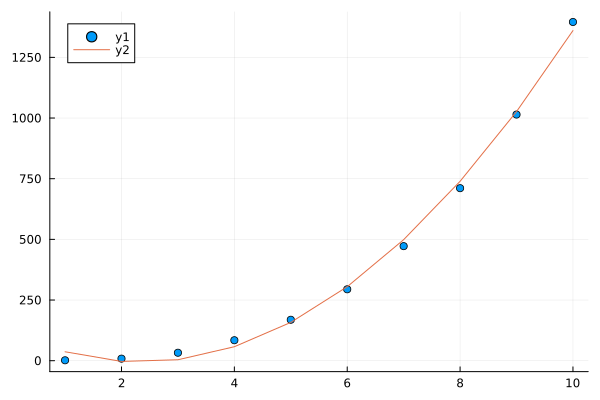

In [7]:
x = collect(1:10)
y = √2.0 .* x.^3 .-  2.0 .* x .+ 3 .* rand(10)
scatter(x, y)
coeffs = least_square_poly(x, y, 2)
p = SimplePolynomial(coeffs)
plot!(x, p.(x))

In [8]:
p

Simple Polynomial{Float64}(123.20955904900802  - 109.83761212640366 x^1 + 23.35653281884356 x^2)
